### Load Data. 

In [1]:
import pandas as pd

dataset = "master_dataset.csv"
df = pd.read_csv(dataset, sep=";", low_memory=False)

### QUALITY MEASURES.

In [3]:
risk_infection = df['risk_infection']
risk_mortality = df['risk_mortality']

# MEDIA - 'RISK_INFECTION' AND 'RISK_MORTALITY'.
infectionMean = risk_infection.mean()
mortalityMean = risk_mortality.mean()

print("Mean Risk Infection: " , infectionMean)
print("Mean Risk Mortality: " , mortalityMean)

Mean Risk Infection:  11.226598348946093
Mean Risk Mortality:  0.32795883979506896


In [4]:
# VARIANCE - 'RISK_INFECTION' AND 'RISK_MORTALITY'.
infectionVar = risk_infection.var()
mortalityVar = risk_mortality.var()

print("Variance Risk Infection: " , infectionVar)
print("Variance Risk Mortality: " , mortalityVar)

Variance Risk Infection:  197.18437225097995
Variance Risk Mortality:  0.7494979851860268


### DATA PROCESSING AND CLEANING. 

In [2]:
# TRANSFORMATION CATEGORICAL TO NUMERIC VARIABLES. 

# PROCESS VARIABLES WITH NULL VALUES TO 0. 

df['age']= df['age'].replace({"0_10":1,"10_20":2,"20_30":3,"30_40":4,"40_50":5,"50_60":6,"60_70":7,"70_80":8,"80_90":9,"90_100":10,"100_110":0})
df['ip_accuracy']= df['ip_accuracy'].fillna(0)
df['bmi']= df['bmi'].fillna(0)
df['alcohol']= df['alcohol'].fillna(0)
df['cannabis']= df['cannabis'].fillna(0)
df['amphetamines']= df['amphetamines'].fillna(0)
df['cocaine']= df['cocaine'].fillna(0)
df['lsd']= df['lsd'].fillna(0)
df['mdma']= df['mdma'].fillna(0)
df['contacts_count']= df['contacts_count'].fillna(0)
df['house_count']= df['house_count'].fillna(0)
df['public_transport_count']= df['public_transport_count'].fillna(0)
df['worried']= df['worried'].fillna(0)
df['rate_reducing_mask']= df['rate_reducing_mask'].fillna(0)
df['opinion_mortality']= df['opinion_mortality'].fillna(0)
df['opinion_infection']= df['opinion_infection'].fillna(0)
df['rate_reducing_mask']= df['rate_reducing_mask'].fillna(0)
df['prescription_medication']= df['prescription_medication'].fillna(0)

# PROCESS EMPTY VARIABLES TO NONE.

df['region']= df['region'].fillna('none')
df['country']= df['country'].fillna('none')
df['insurance']= df['insurance'].fillna('none')
df['income']= df['income'].fillna('none')
df['race']= df['race'].fillna('none')
df['immigrant']= df['immigrant'].fillna('none')
df['smoking']=df['smoking'].fillna('none')
df['working']= df['working'].fillna('none')
df['rate_reducing_mask_type']=df['rate_reducing_mask_type'].fillna('none')

In [3]:
# SEPARATING CATEGORICAL AND NUMERICAL VARIABLES FOR YOUR FUTURE PROCESSING WITH ONE HOT ENCODER.

Xsubset =df[['region','country','ip_latitude','ip_longitude','ip_accuracy','sex','age','height','weight','bmi',
'blood_type','insurance','income','race','immigrant','smoking','alcohol','cannabis','amphetamines','cocaine','lsd',
'mdma','contacts_count','house_count','public_transport_count','working','worried','rate_reducing_risk_single','rate_reducing_risk_single_social_distancing',
'rate_reducing_risk_single_washing_hands','rate_reducing_risk_house','rate_reducing_risk_house_social_distancing','rate_reducing_risk_house_washing_hands',
'rate_reducing_risk_single_sanitizer','rate_reducing_mask','rate_reducing_mask_type','rate_government_action','rate_government_control','rate_government_spend',
'covid19_positive','covid19_symptoms','covid19_contact','asthma','kidney_disease','liver_disease','compromised_immune','heart_disease','lung_disease','diabetes',
'hiv_positive','hypertension','other_chronic','nursing_home','health_worker','prescription_medication','opinion_infection','opinion_mortality','risk_infection','risk_mortality']]

# IMPLEMENTATION OF ONE HOT ENCODER. 

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

procesado = make_column_transformer(
    (StandardScaler(),['ip_latitude','ip_longitude','ip_accuracy','age','height','weight','bmi','alcohol','cannabis',
                       'amphetamines','cocaine','lsd','mdma','contacts_count','house_count','public_transport_count',
                       'worried','rate_reducing_risk_single','rate_reducing_risk_single_social_distancing','rate_reducing_risk_single_washing_hands','rate_reducing_risk_house',
                       'rate_reducing_risk_house_social_distancing','rate_reducing_risk_house_washing_hands','rate_reducing_risk_single_sanitizer','rate_reducing_mask',
                       'rate_government_action','rate_government_control','rate_government_spend','covid19_symptoms','covid19_contact','asthma','kidney_disease','liver_disease',
                       'compromised_immune','heart_disease','lung_disease','diabetes','hiv_positive','hypertension','other_chronic','nursing_home','health_worker', 'opinion_infection',
                       'opinion_mortality','prescription_medication','risk_infection','risk_mortality']),
    (OneHotEncoder(),[ 'region','sex','blood_type','insurance','income','race','immigrant','smoking','working',
                       'rate_reducing_mask_type']))
X = procesado.fit_transform(Xsubset)
categorical_features = ['region','sex','blood_type','insurance','income','race','immigrant','smoking','working',
                        'rate_reducing_mask_type']
nombresData1 = ['ip_latitude','ip_longitude','ip_accuracy','age','height','weight','bmi','alcohol','cannabis',
                        'amphetamines','cocaine','lsd','mdma','contacts_count','house_count','public_transport_count',
                        'worried','rate_reducing_risk_single','rate_reducing_risk_single_social_distancing','rate_reducing_risk_single_washing_hands','rate_reducing_risk_house',
                        'rate_reducing_risk_house_social_distancing','rate_reducing_risk_house_washing_hands','rate_reducing_risk_single_sanitizer','rate_reducing_mask',
                        'rate_government_action','rate_government_control','rate_government_spend','covid19_symptoms','covid19_contact','asthma','kidney_disease','liver_disease',
                        'compromised_immune','heart_disease','lung_disease','diabetes','hiv_positive','hypertension','other_chronic','nursing_home','health_worker', 'opinion_infection',
                        'opinion_mortality','prescription_medication','risk_infection','risk_mortality']
nombresData2 = procesado.transformers_[1][1].get_feature_names(categorical_features)
nombresData1.extend(nombresData2)
procesadoF = pd.DataFrame(data=X,columns=nombresData1)
# procesadoF.to_csv("DatosCovidPreprocesado.csv", sep=";",index = False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
import numpy as np

# FINAL DATA CLEANING. 

for i in range(111):
    procesadoF.replace('?', np.nan, inplace = True)
    procesadoF.dropna(subset=[procesadoF.columns[i]], axis=0, inplace = True)
    procesadoF.reset_index(drop = True, inplace = True)

### PROPOSED METHOD.

In [44]:
# DIMENSIONALITY REDUCTION PCA.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# SEARCH FOR THE NUMBER OF OPTIMAL COMPONENTS ACCORDING TO THE ELBOW METHOD.

pca = PCA()
principalComponents = pca.fit_transform(procesadoF)
a = range(111)
num_pc = a[::1]
principalDF = pd.DataFrame(data = principalComponents, columns = num_pc)
principalDF = round(principalDF, 2)
explained_variance = pca.explained_variance_ratio_

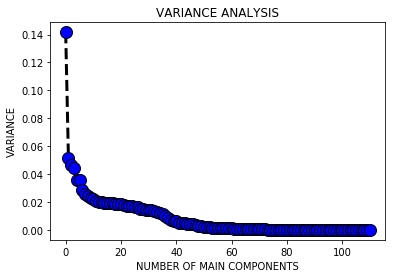

In [45]:
# GRAPHIC PCA ELBOW METHOD. 

# import matplotlib.pyplot as plt

explained_variance
a = range(111)
num_pc= a[::1]
plt.plot(num_pc, explained_variance, color='black', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('VARIANCE ANALYSIS')
plt.xlabel('NUMBER OF MAIN COMPONENTS')
plt.ylabel('VARIANCE')
plt.show()

In [298]:
# APPLICATION OF PCA WITH 40 COMPONENTS.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
num_components=20
pca = PCA(num_components)
principalComponents = pca.fit_transform(procesadoF)
a = range(num_components)
num_pc= a[::1]
principalDf = pd.DataFrame(data = principalComponents, columns = num_pc)
principalDf=round(principalDf, 2)
explained_variance=pca.explained_variance_ratio_

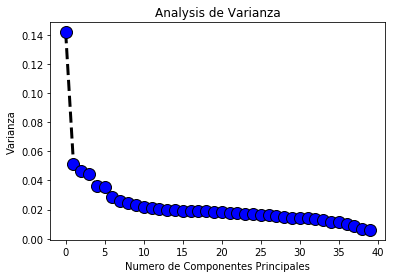

In [18]:
# GRAPHIC OF PCA WITH 40 COMPONENTS.

a = range(num_components)
num_pc= a[::1]
plt.plot(num_pc, explained_variance, color='black', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('Analysis de Varianza')
plt.xlabel('Numero de Componentes Principales')
plt.ylabel('Varianza')
plt.show()

### Clustering.

In [299]:
from sklearn.cluster import KMeans

def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDf, 3)
kmeans = pd.DataFrame(clust_labels)

In [6]:
import numpy as np
clusteringPCA = np.column_stack((kmeans, principalDf, df['risk_mortality']))

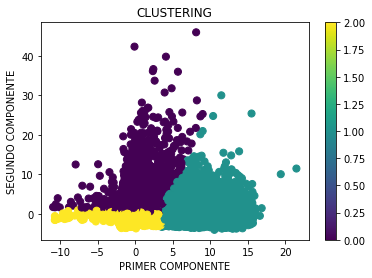

In [300]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf[0],
                     principalDf[1],
                     c=kmeans[0],
                     s=50)
ax.set_title('CLUSTERING')
ax.set_xlabel('PRIMER COMPONENTE')
ax.set_ylabel('SEGUNDO COMPONENTE')
plt.colorbar(scatter)

In [7]:
import numpy as np
unique, counts = np.unique(kmeans, return_counts=True)
dict(zip(unique, counts))

{0: 37231, 1: 660939, 2: 76729}

In [8]:
a = np.zeros((660939, 4))
np.empty_like(a)
for i in range(660939):
    for j in range(0,4):
        if(clusteringPCA[i][0] == 1):
            a[i][j] = clusteringPCA[i][j]

In [9]:
PCAclustering = pd.DataFrame(a, index=range(1, a.shape[0] + 1),
                          columns=range(1, a.shape[1] + 1))

In [10]:
PCAclustering.head()

,1,2,3,4
1,1.0,-0.26,-1.25,0.73
2,1.0,-0.24,-1.70,0.60
3,1.0,0.38,10.80,-1.29
4,1.0,-0.06,3.33,-0.07
5,1.0,-0.36,-1.32,0.83


In [11]:
clust_labels, cent = doKmeans(procesadoF, 3)
kmeanss = pd.DataFrame(clust_labels)

### Learning method.

In [12]:
# PREPARATION SEPARATION INPUT AND OUTPUT VARIABLES DATA PCA.

XPCA = PCAclustering[[2,3]]
YPCA = PCAclustering[4]

In [13]:
# ANALYSIS WITH MULTI LINEAR REGRESSION.

# PREPARATION SEPARATION INPUT AND OUTPUT VARIABLES.

X = procesadoF[['ip_latitude','ip_longitude','ip_accuracy','age','height','weight','bmi','alcohol','cannabis','amphetamines',
               'cocaine','lsd','mdma','contacts_count','house_count','public_transport_count','worried','rate_reducing_risk_single',
               'rate_reducing_risk_single_social_distancing','rate_reducing_risk_single_washing_hands','rate_reducing_risk_house',
               'rate_reducing_risk_house_social_distancing','rate_reducing_risk_house_washing_hands','rate_reducing_risk_single_sanitizer',
               'rate_reducing_mask','rate_government_action','rate_government_control','rate_government_spend','covid19_symptoms',
               'covid19_contact','asthma','kidney_disease','liver_disease','compromised_immune','heart_disease','lung_disease',
               'diabetes','hiv_positive','hypertension','other_chronic','nursing_home','health_worker','opinion_infection',
               'opinion_mortality','prescription_medication','region_AF','region_AS','region_EU','region_NorthA','region_OC','region_SA',
               'region_none','sex_female','sex_male','sex_other','blood_type_abn','blood_type_abp','blood_type_an','blood_type_ap',
               'blood_type_bn','blood_type_bp','blood_type_on','blood_type_op','blood_type_unknown','insurance_blank',
               'insurance_no','insurance_none','insurance_yes','income_blank','income_gov','income_high','income_low',
               'income_med','income_none','race_asian','race_black','race_blank',
               'race_hispanic','race_mixed','race_none','race_other','race_white','immigrant_blank','immigrant_immigrant',
               'immigrant_native','immigrant_none','smoking_never','smoking_none','smoking_quit0','smoking_quit10','smoking_quit5',
               'smoking_vape','smoking_yesheavy','smoking_yeslight','smoking_yesmedium','working_home','working_never',
               'working_none','working_stopped','working_travel critical','working_travel non critical',
               'rate_reducing_mask_type_clothhome','rate_reducing_mask_type_clothstore','rate_reducing_mask_type_level1',
               'rate_reducing_mask_type_level2','rate_reducing_mask_type_level3','rate_reducing_mask_type_na',
               'rate_reducing_mask_type_none','rate_reducing_mask_type_surgical']]
    
Y1 = procesadoF['risk_mortality']

Y2 = procesadoF['risk_infection']

In [14]:
# SPLITING DATASET INTO TRAINENG SET AND TEST SET - PCA.

from sklearn.model_selection import train_test_split 

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(XPCA, YPCA, test_size=0.2, random_state=0)

In [15]:
# SPLITING DATASET INTO TRAINING SET AND TEST SET. 

X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=0)

### LINEAR REGRESSION. 

In [16]:
# LINEAR REGRESSION WITH PCA. 

from sklearn.linear_model import LinearRegression

regressorPCA = LinearRegression()

regressorPCA.fit(X_train_pca, y_train_pca);

b = regressorPCA.intercept_

m = regressorPCA.coef_

In [17]:
# PREDICTION WITH PCA. 

y_pred_pca = regressorPCA.predict(X_test_pca)

# COMPARATIONS LINEAR REGRESSION WITH PCA. 

dff = pd.DataFrame({'Current': y_test_pca, 'Predicted': y_pred_pca})

dff.head()

,Current,Predicted
72368,0.00,0.301582
495978,-0.29,-0.264770
233820,-0.66,-0.420950
299503,0.09,0.177688
356239,-0.64,-0.262012


In [36]:
# EVALUATIONS LINEAR REGRESSION WITH PCA. 

from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_pca, y_pred_pca))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_pca, y_pred_pca))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_pca)))  

Mean Absolute Error:  0.5280835654213089
Mean Squared Error: 0.5845671570438382
Root Mean Squared Error: 0.7645699163868784


In [37]:
#LINEAR REGRESSION. 

regressor = LinearRegression()

regressor.fit(X_train, y_train);

b = regressor.intercept_

m = regressor.coef_

In [38]:
# PREDICTIONS.

y_pred = regressor.predict(X_test)

# COMPARATIONS LINEAR REGRESSION. 

dff = pd.DataFrame({'Current': y_test, 'Predicted': y_pred})

dff.head()

,Current,Predicted
607163,0.869829,0.828881
375782,-0.271398,0.152737
141081,-0.321067,-0.621181
691565,0.596073,0.237199
369439,-0.032295,-0.066224


In [39]:
# EVALUATIONS LINEAR REGRESSION. 

from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  


Mean Absolute Error:  0.32139239453078733
Mean Squared Error: 0.6206963492585188
Root Mean Squared Error: 0.7878428455336247


### BAYESIAN REGRESSION.

In [40]:
# BAYESIAN REGRESSION WITH PCA. 

from sklearn import linear_model

reg = linear_model.BayesianRidge(compute_score=True)

reg.fit(X_train_pca, y_train_pca)

# PREDICTIONS.

y_pred_pca_bay = reg.predict(X_test_pca)

# COMPARATIONS BAYESIAN REGRESSION. 

dfff = pd.DataFrame({'Current': y_test_pca, 'Predicted': y_pred_pca_bay})

dfff.head()

,Current,Predicted
569218,0.00,0.173593
485061,-0.76,-0.060145
548799,0.00,0.173593
273614,-0.15,0.061034
281183,-0.61,-0.336985


In [42]:
# EVALUATIONS BAYESIAN REGRESSION WITH PCA.

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_pca, y_pred_pca_bay))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_pca, y_pred_pca_bay))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_pca_bay))) 

Mean Absolute Error:  0.5280818505854986
Mean Squared Error: 0.5845670354028061
Root Mean Squared Error: 0.7645698368382093


In [43]:
# BAYESIAN REGRESSION. 

reg = linear_model.BayesianRidge()

reg.fit(X_train, y_train)

# PREDICTIONS.

y_pred_b = reg.predict(X_test)

# COMPARATIONS BAYESIAN REGRESSION. 

dfff = pd.DataFrame({'Current': y_test, 'Predicted': y_pred_b})

dfff.head()

,Current,Predicted
607163,0.869829,0.828657
375782,-0.271398,0.152899
141081,-0.321067,-0.621366
691565,0.596073,0.237028
369439,-0.032295,-0.066438


In [44]:
# EVALUATIONS BAYESIAN REGRESSION.

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_b))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_b))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_b))) 

Mean Absolute Error:  0.3212883884975776
Mean Squared Error: 0.6206704579308248
Root Mean Squared Error: 0.7878264135777784


### POLYNOMIAL REGRESSION.

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poli_reg = PolynomialFeatures(degree = 2)

X_train_pca_poli = poli_reg.fit_transform(X_train_pca)

X_test_pca_poli = poli_reg.fit_transform(X_test_pca)

pr_pca = linear_model.LinearRegression()

# PREDICTIONS. 

pr_pca.fit(X_train_pca_poli, y_train_pca)

Y_pred_pr_pca = pr_pca.predict(X_test_pca_poli)

In [48]:
# COMPARATIONS POLYNOMIAL REGRESSION WITH PCA. 

dfff = pd.DataFrame({'Current': y_test_pca, 'Predicted': Y_pred_pr_pca})

dfff.head()

,Current,Predicted
569218,0.00,0.171211
485061,-0.76,-0.048374
548799,0.00,0.171211
273614,-0.15,0.059224
281183,-0.61,-0.336577


In [50]:
# EVALUATIONS POLYNOMIAL REGRESSION WITH PCA.

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_pca, Y_pred_pr_pca))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_pca, Y_pred_pr_pca))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pca, Y_pred_pr_pca)))

Mean Absolute Error:  0.5279194765051536
Mean Squared Error: 0.5849320177119691
Root Mean Squared Error: 0.7648084843357643


In [52]:
# POLYNOMIAL REGRESSION. 

poli_reg = PolynomialFeatures(degree = 2)

X_train_poli = poli_reg.fit_transform(X_train)

X_test_poli = poli_reg.fit_transform(X_test)

pr = linear_model.LinearRegression()

# PREDICTIONS. 

pr.fit(X_train_poli, y_train)

Y_pred_pr = pr.predict(X_test_poli)

In [53]:
# COMPARATIONS POLYNOMIAL REGRESSION. 

dfff = pd.DataFrame({'Current': y_test, 'Predicted': Y_pred_pr})

dfff.head()

,Current,Predicted
607163,0.869829,0.828899
375782,-0.271398,0.152695
141081,-0.321067,-0.621216
691565,0.596073,0.237221
369439,-0.032295,-0.066242


In [54]:
# EVALUATIONS POLYNOMIAL REGRESSION.

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, Y_pred_pr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred_pr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_pr)))

Mean Absolute Error:  0.3213936164469987
Mean Squared Error: 0.6206961949532946
Root Mean Squared Error: 0.787842747604682


### VISUALIZATION. 

In [203]:
# DESCRIPTIVE STATISTICS.

diseases = procesadoF[['kidney_disease','liver_disease','compromised_immune','heart_disease','lung_disease',
                       'diabetes','hiv_positive','hypertension','asthma','other_chronic','covid19_symptoms',
                       'risk_infection','risk_mortality']]

personalConditions = procesadoF[['age','height','weight','bmi','contacts_count','house_count','public_transport_count',
                                 'worried','rate_reducing_risk_single_washing_hands','rate_reducing_risk_house',
                                 'rate_reducing_risk_house_social_distancing','risk_infection','risk_mortality']]

psychotropicSubstances = procesadoF[['alcohol','cannabis','amphetamines','cocaine','lsd','mdma','risk_infection',
                                     'risk_mortality']]

In [68]:
diseases.head()

,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,asthma,other_chronic,covid19_symptoms,risk_infection,risk_mortality
0,-0.05773,-0.028114,-0.252744,-0.13023,-0.116002,-0.252698,-0.058022,-0.391038,-0.432993,-0.285841,-0.128984,-0.443420,-0.321067
1,-0.05773,-0.028114,-0.252744,-0.13023,-0.116002,-0.252698,-0.058022,-0.391038,-0.432993,-0.285841,-0.128984,-0.443420,-0.321067
2,-0.05773,-0.028114,3.956573,-0.13023,8.620519,3.957296,-0.058022,2.557296,-0.432993,-0.285841,-0.128984,0.055077,16.602126
3,-0.05773,-0.028114,-0.252744,-0.13023,-0.116002,3.957296,-0.058022,2.557296,-0.432993,-0.285841,-0.128984,-0.372206,2.220127
4,-0.05773,-0.028114,-0.252744,-0.13023,-0.116002,-0.252698,-0.058022,-0.391038,-0.432993,-0.285841,-0.128984,-0.443420,-0.321067


In [70]:
personalConditions.head()

,age,height,weight,bmi,contacts_count,house_count,public_transport_count,worried,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,risk_infection,risk_mortality
0,-1.008454,0.781974,0.102804,-0.256596,-1.085394,0.553484,-0.042835,-0.343284,-0.305303,-1.135681,-0.266378,-0.443420,-0.321067
1,-0.279476,-1.025002,-1.303942,-1.026278,-1.085394,-0.744490,-0.042835,-0.343284,-0.305303,-1.135681,-0.266378,-0.443420,-0.321067
2,3.365416,1.324067,0.351053,-0.256596,-1.085394,0.553484,-0.042835,-0.343284,-0.305303,-1.135681,-0.266378,0.055077,16.602126
3,1.907459,0.239881,0.433803,0.336438,-1.085394,1.202471,-0.042835,-0.343284,-0.305303,-1.135681,-0.266378,-0.372206,2.220127
4,-0.279476,-0.302212,-0.641944,-0.546804,-1.085394,2.500444,-0.042835,-0.343284,-0.305303,-1.135681,-0.266378,-0.443420,-0.321067


In [70]:
psychotropicSubstances.head()

,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,risk_infection,risk_mortality
0,-0.658953,-0.28881,0.35251,0.736181,1.28979,1.317813,-0.443420,-0.321067
1,-0.658953,-0.28881,0.35251,0.736181,1.28979,1.317813,-0.443420,-0.321067
2,-0.658953,-0.28881,0.35251,0.736181,1.28979,1.317813,0.055077,16.602126
3,-0.658953,-0.28881,0.35251,0.736181,1.28979,1.317813,-0.372206,2.220127
4,-0.658953,-0.28881,0.35251,0.736181,1.28979,1.317813,-0.443420,-0.321067


In [26]:
# EVALUATE CORRELATIONS.

correlationDiseases = diseases.corr()

correlationDiseases

a[[0, 1, 3], :]

array([[ 1.  , -0.26, -1.25,  0.74],
       [ 1.  , -0.24, -1.7 ,  0.61],
       [ 1.  , -0.06,  3.33, -0.07]])

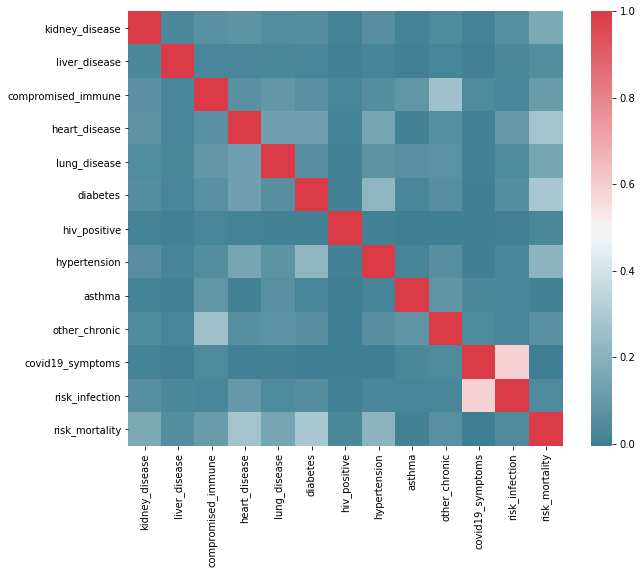

In [83]:
import seaborn as sb

f, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(correlationDiseases, mask=np.zeros_like(correlationDiseases, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

In [73]:
personalConditions = personalConditions.corr()

personalConditions

,age,height,weight,bmi,contacts_count,house_count,public_transport_count,worried,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,risk_infection,risk_mortality
age,1.000000,0.069047,0.002310,-0.024136,-0.478280,-0.455416,-0.148406,0.001282,-0.015523,-0.022939,-0.007028,-0.266634,0.744984
height,0.069047,1.000000,0.345564,-0.058345,-0.136641,-0.239488,-0.142775,-0.130878,-0.134884,0.020198,-0.126718,-0.139371,0.007862
weight,0.002310,0.345564,1.000000,0.916576,-0.085584,-0.145554,-0.230261,-0.296206,-0.303639,0.034616,-0.294890,-0.159420,0.040190
bmi,-0.024136,-0.058345,0.916576,1.000000,-0.034522,-0.055619,-0.184394,-0.259345,-0.265576,0.028029,-0.259734,-0.111434,0.040351
contacts_count,-0.478280,-0.136641,-0.085584,-0.034522,1.000000,0.351586,-0.049824,-0.234231,-0.233031,-0.105964,-0.252546,0.506921,-0.353751
house_count,-0.455416,-0.239488,-0.145554,-0.055619,0.351586,1.000000,-0.096527,-0.223041,-0.219223,0.022947,-0.218350,0.052635,-0.313370
public_transport_count,-0.148406,-0.142775,-0.230261,-0.184394,-0.049824,-0.096527,1.000000,0.075581,0.054282,-0.151552,0.026847,0.006468,-0.118782
worried,0.001282,-0.130878,-0.296206,-0.259345,-0.234231,-0.223041,0.075581,1.000000,0.991499,-0.745108,0.968913,-0.135133,-0.108436
rate_reducing_risk_single_washing_hands,-0.015523,-0.134884,-0.303639,-0.265576,-0.233031,-0.219223,0.054282,0.991499,1.000000,-0.720147,0.975455,-0.141224,-0.130606
rate_reducing_risk_house,-0.022939,0.020198,0.034616,0.028029,-0.105964,0.022947,-0.151552,-0.745108,-0.720147,1.000000,-0.698281,-0.135193,-0.033806


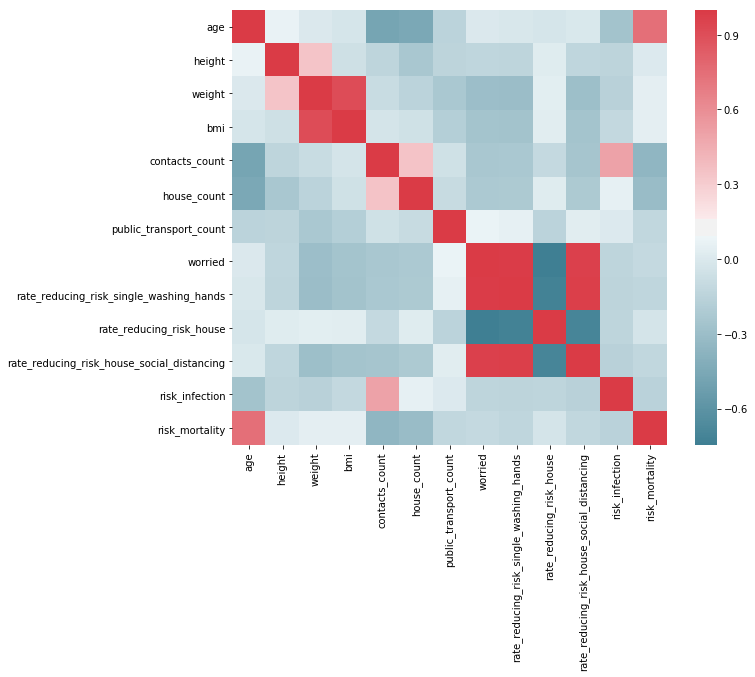

In [76]:
import seaborn as sb
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(personalConditions, mask=np.zeros_like(personalConditions, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

In [86]:
psychotropicSubstances = psychotropicSubstances.corr()

psychotropicSubstances

,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,risk_infection,risk_mortality
alcohol,1.000000,0.072116,0.037952,0.109942,0.095362,0.104568,-0.009868,0.013282
cannabis,0.072116,1.000000,0.076118,0.153752,0.180440,0.165854,-0.013167,-0.039851
amphetamines,0.037952,0.076118,1.000000,0.193962,0.217821,0.227918,0.022395,0.022141
cocaine,0.109942,0.153752,0.193962,1.000000,0.452367,0.487872,0.022933,0.046965
lsd,0.095362,0.180440,0.217821,0.452367,1.000000,0.687885,0.027026,0.060797
mdma,0.104568,0.165854,0.227918,0.487872,0.687885,1.000000,0.030974,0.052170
risk_infection,-0.009868,-0.013167,0.022395,0.022933,0.027026,0.030974,1.000000,0.040420
risk_mortality,0.013282,-0.039851,0.022141,0.046965,0.060797,0.052170,0.040420,1.000000


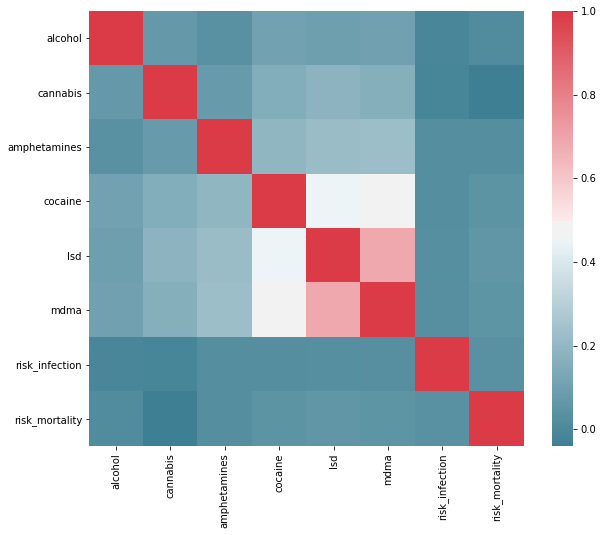

In [87]:
f, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(psychotropicSubstances, mask=np.zeros_like(psychotropicSubstances, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

In [5]:
dfn = df.to_numpy()

In [6]:
splits = dfn[:,49]  # -> Diabetes
splits2 = dfn[:,59] # -> Risk Mortality
splits3 = dfn[:,47] # -> Heart
splits4 = dfn[:,51] # -> Hypertension
splits5 = dfn[:,7]  # -> age
splits6 = dfn[:,9]  # -> weight
splits7 = dfn[:,10] # -> bmi
splits8 = dfn[:,30] # -> washing hands
splits9 = dfn[:,31] # -> house
splits10 = dfn[:,29]# -> social distancing

In [8]:
import numpy as np
enfermedades = np.column_stack((splits, splits2)) # -> Riesgo segun diabetes. 

In [9]:
enfermedades2 = np.column_stack((splits3, splits2)) # -> Riesgo segun Heart. 

In [10]:
enfermedades3 = np.column_stack((splits4, splits2)) # -> Riesgo segun hypertension. 

In [11]:
auxiliar = 0
for i in range(774899):
    for j in range(0,1):
        if(enfermedades[i][0] == 1):
            auxiliar = auxiliar + enfermedades[i][1]
meanMortalityXdiabetes = auxiliar / 774899

In [12]:
auxiliar2 = 0
for i in range(774899):
    for j in range(0,1):
        if(enfermedades2[i][0] == 1):
            auxiliar2 = auxiliar2 + enfermedades2[i][1]
meanMortalityXheart = auxiliar2 / 774899

In [13]:
auxiliar3 = 0
for i in range(774899):
    for j in range(0,1):
        if(enfermedades3[i][0] == 1):
            auxiliar3 = auxiliar3 + enfermedades3[i][1]
meanMortalityXhypertension = auxiliar3 / 774899

In [14]:
print("Diabetes= ",meanMortalityXdiabetes," Heart= ",meanMortalityXheart," Hypertension= ",meanMortalityXhypertension)

Diabetes=  0.07838422813811972  Heart=  0.03589503793397535  Hypertension=  0.10429823241482739


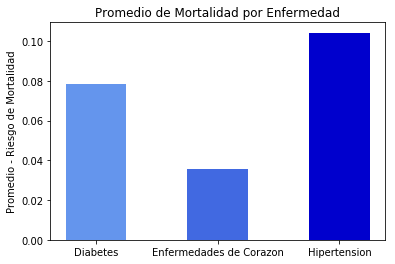

In [19]:
import matplotlib.pyplot as plt
enfermedades = ["Diabetes", "Enfermedades de Corazon", "Hipertension"]
valores = [0.0783,0.0358,0.1042]
colores = ["cornflowerblue","royalblue","mediumblue"]
plt.title("Promedio de Mortalidad por Enfermedad")
plt.bar(enfermedades, height= valores, color=colores, width=0.5)
plt.ylabel("Promedio - Riesgo de Mortalidad")
plt.show()

In [20]:
condicionAge = np.column_stack((splits5, splits2))
condicionWeight = np.column_stack((splits6, splits2))
condicionBmi = np.column_stack((splits7, splits2))
condicionWashingHands = np.column_stack((splits8, splits2))
condicionHouse = np.column_stack((splits9, splits2))
condicionSocialDistancing = np.column_stack((splits10, splits2))

In [21]:
auxiliarAge = 0
for i in range(774899):
    for j in range(0,1):
        if(condicionAge[i][0] >= 7):
            auxiliarAge = auxiliarAge + condicionAge[i][1]
meanMortalityXAge = auxiliarAge / 774899

In [22]:
auxiliarWeight = 0
for i in range(774899):
    for j in range(0,1):
        if(condicionWeight[i][0] >= 90):
            auxiliarWeight = auxiliarWeight + condicionWeight[i][1]
meanMortalityXWeight = auxiliarWeight / 774899

In [23]:
auxiliarBmi = 0
for i in range(774899):
    for j in range(0,1):
        if(condicionBmi[i][0] >= 25):
            auxiliarBmi = auxiliarBmi + condicionBmi[i][1]
meanMortalityXBmi = auxiliarBmi / 774899

In [24]:
auxiliarWashingHands = 0
for i in range(774899):
    for j in range(0,1):
        if(condicionWashingHands[i][0] <= 0):
            auxiliarWashingHands = auxiliarWashingHands + condicionWashingHands[i][1]
meanMortalityXWashingHands = auxiliarWashingHands / 774899

In [25]:
auxiliarHouse = 0
for i in range(774899):
    for j in range(0,1):
        if(condicionHouse[i][0] <= 0):
            auxiliarHouse = auxiliarHouse + condicionHouse[i][1]
meanMortalityXHouse = auxiliarHouse / 774899

In [26]:
auxiliarSocialDistancing = 0
for i in range(774899):
    for j in range(0,1):
        if(condicionSocialDistancing[i][1] >= 1):
            auxiliarSocialDistancing = auxiliarSocialDistancing + condicionSocialDistancing[i][1]
meanMortalityXSocialDistancing = auxiliarSocialDistancing / 774899

Text(0, 0.5, 'Promedio - Riesgo de Mortalidad')

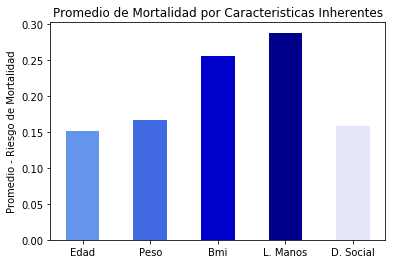

In [27]:
caracteristicasPersonales = ["Edad","Peso","Bmi","L. Manos","D. Social"]
valoresPersonales = [meanMortalityXAge,meanMortalityXWeight,meanMortalityXBmi,meanMortalityXWashingHands,
                     meanMortalityXSocialDistancing]
colores = ["cornflowerblue","royalblue","mediumblue","darkblue","lavender"]
plt.title("Promedio de Mortalidad por Caracteristicas Inherentes")
plt.bar(caracteristicasPersonales, height= valoresPersonales, color=colores, width=0.5)
plt.ylabel("Promedio - Riesgo de Mortalidad")

### GRAFICA DE ERRORES.

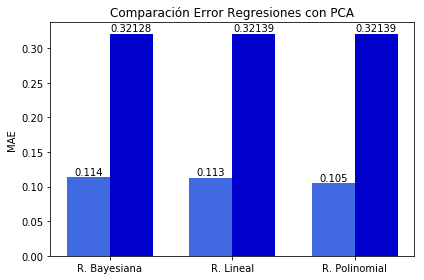

In [28]:
regresion = ['R. Bayesiana','R. Lineal','R. Polinomial']
con_pca = [0.114, 0.113, 0.105]
sin_pca = [0.32128,0.32139, 0.32139]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(regresion))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, con_pca, width, label='PCA',color="royalblue")
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, sin_pca, width, label='Normal',color="mediumblue")

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('MAE')
ax.set_title('Comparación Error Regresiones con PCA')
ax.set_xticks(x)
ax.set_xticklabels(regresion)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
#ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()